In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import statistics
import kmax as kx
import utility as util
from hierarchy import *
from scipy.optimize import fsolve
from IPython.core.debugger import set_trace

# Simulations 2

## Length case ($\omega_e=1$)

In [10]:
def iterate_GWBP_EX_N(num_samples=100):
    X_Ns = []
    for _ in range(num_samples):
        # Poisson Branching
        sample_tree = nx.Graph(GWBP(LAM, MAXLEVEL=100))
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Get X for sample_tree
        _,_,X = util.path_cover(sample_tree, list(sample_tree.nodes())[0])
            
        # Calculate X/N for current sample
        # GW Branching Process produces a single connected (tree) component, so N = |V|
        X_Ns.append(X / nx.number_of_nodes(sample_tree))
    return X_Ns

In [20]:
#generate data will save to csv
LAM = 0.7
GWBP_XNs = iterate_GWBP_EX_N(10000)
GWBP_XNs_modified = [100 * x for x in GWBP_XNs]

In [21]:
print(GWBP_XNs_modified)

[0.0, 50.0, 50.0, 80.0, 80.0, 73.33333333333333, 33.33333333333333, 0.0, 75.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 66.66666666666666, 85.71428571428571, 0.0, 0.0, 83.33333333333334, 0.0, 74.28571428571429, 0.0, 75.0, 50.0, 75.75757575757575, 0.0, 0.0, 0.0, 50.0, 0.0, 66.66666666666666, 0.0, 66.66666666666666, 75.0, 0.0, 69.56521739130434, 66.66666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 80.0, 50.0, 75.0, 76.08695652173914, 0.0, 76.92307692307693, 50.0, 0.0, 65.51724137931035, 0.0, 0.0, 75.0, 0.0, 71.42857142857143, 50.0, 50.0, 50.0, 75.0, 50.0, 66.66666666666666, 0.0, 50.0, 76.92307692307693, 71.42857142857143, 50.0, 63.63636363636363, 0.0, 60.0, 0.0, 0.0, 0.0, 0.0, 75.0, 60.0, 0.0, 80.0, 50.0, 0.0, 0.0, 75.0, 0.0, 80.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.66666666666666, 77.77777777777779, 50.0, 0.0, 0.0, 50.0, 50.0, 66.66666666666666, 0.0, 66.66666666666666, 0.0, 50.0, 79.06976744186046, 69.23076923076923, 0.0, 0.0, 66.66666666666666, 0.0, 50.0, 66.66666666666666, 0.0

### Histogram

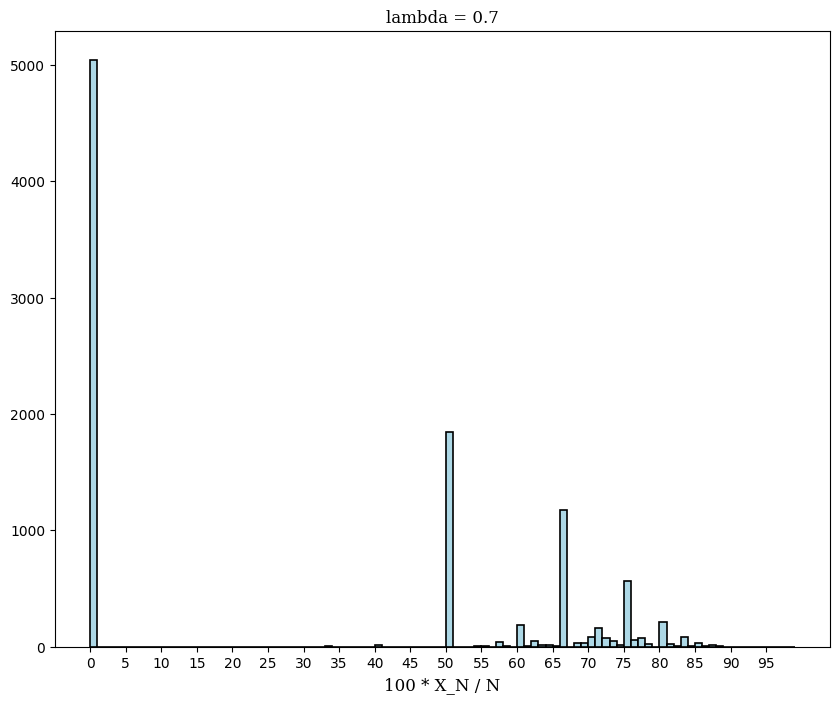

In [26]:
hfont = {'fontname':'Helvetica'}

bins = np.arange(0,100,1)
plt.figure(figsize=(10,8))
plt.hist(GWBP_XNs_modified, bins=bins, edgecolor = 'black', linewidth=1.2, color = 'lightblue')
plt.xticks(np.arange(0,100,5))
plt.title(f"lambda = {LAM}", fontfamily=['Serif'])
plt.xlabel("100 * X_N / N", fontfamily=['Serif'], fontsize = 12)
plt.show()

### q-q Plot

### $\frac{\text{Var}$

## Weight case ($\omega_e\sim\mathcal{U}(0,1)$)